In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.datasets import make_multilabel_classification
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn_pandas import DataFrameMapper, gen_features

%matplotlib notebook
%matplotlib inline

In [ ]:
df = pd.read_csv('data/dataset_57_hypothyroid.csv', na_values = '?')
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,F,f,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,f,NaN,other,negative
3768,68.0,F,f,f,f,f,f,f,f,f,...,t,124.0,t,1.08,t,114.0,f,NaN,SVI,negative
3769,74.0,F,f,f,f,f,f,f,f,f,...,t,112.0,t,1.07,t,105.0,f,NaN,other,negative
3770,72.0,M,f,f,f,f,f,f,f,f,...,t,82.0,t,0.94,t,87.0,f,NaN,SVI,negative


In [ ]:
TARGET = 'Class'
SEED = 42

# EDA + DP

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   float64
 1   sex                        3622 non-null   object 
 2   on_thyroxine               3772 non-null   object 
 3   query_on_thyroxine         3772 non-null   object 
 4   on_antithyroid_medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid_surgery            3772 non-null   object 
 8   I131_treatment             3772 non-null   object 
 9   query_hypothyroid          3772 non-null   object 
 10  query_hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

In [ ]:
df.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,3771.000000,3403.000000,3003.000000,3541.000000,3385.000000,3387.000000,0.0
mean,51.735879,5.086766,2.013500,108.319345,0.995000,110.469649,NaN
std,20.084958,24.521470,0.827434,35.604248,0.195457,33.089698,NaN
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000,NaN
25%,36.000000,0.500000,1.600000,88.000000,0.880000,93.000000,NaN
50%,54.000000,1.400000,2.000000,103.000000,0.980000,107.000000,NaN
75%,67.000000,2.700000,2.400000,124.000000,1.080000,124.000000,NaN
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000,NaN


In [ ]:
df.duplicated().sum()

61

In [ ]:
df = df.drop_duplicates(keep = False)

As we can see here, TBG feature is ful of NaN values. Drop this feature.

In [ ]:
df = df.drop('TBG', axis = 1)

In [ ]:
df.isna().sum()

age                            1
sex                          148
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH_measured                   0
TSH                          277
T3_measured                    0
T3                           677
TT4_measured                   0
TT4                          139
T4U_measured                   0
T4U                          295
FTI_measured                   0
FTI                          293
TBG_measured                   0
referral_source                0
Class                          0
dtype: int64

There are some missing values, we will deal with them later.

In [ ]:
for col in df.columns:
  print(col)
  print(df[col].unique(), '\n')

age
[ 41.  23.  46.  70.  18.  59.  80.  66.  68.  84.  67.  71.  28.  65.
  42.  63.  51.  81.  54.  55.  60.  25.  73.  34.  78.  37.  85.  26.
  58.  44.  48.  61.  35.  83.  21.  87.  64.  53.  77.  27.  69.  74.
  38.  76.  45.  36.  22.  43.  72.  82.  31.  39.  49.  62.  57.   1.
  50.  30.  29.  75.  19.   7.  79.  17.  24.  15.  32.  47.  16.  52.
  33.  13.  10.  89.  56.  20.  90.  40.  88.  14.  86.  94.  12.   4.
  11.   8.   5. 455.   2.  91.   6.  nan  93.  92.] 

sex
['F' 'M' nan] 

on_thyroxine
['f' 't'] 

query_on_thyroxine
['f' 't'] 

on_antithyroid_medication
['f' 't'] 

sick
['f' 't'] 

pregnant
['f' 't'] 

thyroid_surgery
['f' 't'] 

I131_treatment
['f' 't'] 

query_hypothyroid
['f' 't'] 

query_hyperthyroid
['f' 't'] 

lithium
['f' 't'] 

goitre
['f' 't'] 

tumor
['f' 't'] 

hypopituitary
['f' 't'] 

psych
['f' 't'] 

TSH_measured
['t' 'f'] 

TSH
[1.30e+00 4.10e+00 9.80e-01 1.60e-01 7.20e-01 3.00e-02      nan 2.20e+00
 6.00e-01 2.40e+00 1.10e+00 2.80e+00 3.30e+00

We can gather some information about this output. The `measured` features only got true or false values. The age has an obvious outlier. And in some feature there are nan values.

Also, it's 100% that we need to encode these features.

As i can see, `T..._measured` is false if `T...` has got a NaN value.

In this case I can drop the `T..._measured` columns.

In [ ]:
df = df.drop(['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured'], axis = 1)

In [ ]:
print('Target variable count of NaN:', df['Class'].isna().sum(), '\n')

df['Class'].value_counts()

Target variable count of NaN: 0 



negative                   3387
compensated_hypothyroid     194
primary_hypothyroid          95
secondary_hypothyroid         2
Name: Class, dtype: int64

`secondary_hypothyroid` has only 2 cases in this dataset. Well, thats a very small number of occurence, and we basically can't do augmentation, since if we just copy the same row, that will be duplicates, and we don't know how whould a true secondary hypothyroid measure numbers look like.

In [ ]:
df = df[df[TARGET] != 'secondary_hypothyroid']

In [ ]:
total = df.shape[0]
for col in df.columns:
  nan_rate = df[col].isna().sum() / total
  if nan_rate:
    print(f'{col}: {round(nan_rate * 100, 3)}%')

age: 0.027%
sex: 4.026%
TSH: 7.535%
T3: 18.417%
TT4: 3.781%
T4U: 7.998%
FTI: 7.943%


Check what happens if we drop all rows which has NaN values.

In [ ]:
print('Size of the dataset reduced by:', (1 - df.dropna().shape[0] / df.shape[0]) * 100, '%')

Size of the dataset reduced by: 28.18280739934712 %


That would be too much loss, I think nearly 30% is a significant amount of data. So we need to consider other methods instead of removing them.

## Missing values

In [ ]:
def describer(data, feature):
  TARGET = 'Class'

  print('Number of NaN values:', df[feature].isna().sum())

  print('\n','-'*15, 'ORIGINAL', '-'*15)
  print(df[feature].describe())

  print('\n','-'*15, 'MEDIAN', '*'*15)
  print(df[feature].fillna(df[feature].median()).describe())

  print('\n','-'*15, 'MEAN', '*'*15)
  print(df[feature].fillna(df[feature].mean()).describe())

In [ ]:
df.isnull().sum(axis=1).sort_values(ascending = False)

2145    6
2648    6
150     5
2380    5
3092    5
       ..
1450    0
1451    0
1453    0
1455    0
3771    0
Length: 3676, dtype: int64

In [ ]:
df[df.isnull().sum(axis=1) >= 5]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
66,69.0,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,other,negative
72,59.0,F,f,f,f,t,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,other,negative
150,17.0,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,other,negative
207,21.0,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,other,negative
231,70.0,M,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,other,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606,39.0,F,f,f,f,f,f,f,f,f,...,t,f,f,NaN,NaN,NaN,NaN,NaN,other,negative
3683,21.0,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,other,negative
3702,61.0,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,other,negative
3745,59.0,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,other,negative


We have 185 row where TSH, T3, TT4, T4u and FTI are not measured, or they are unknown. Well, we can't predict those values (every Class for this is "negative"), so I drop these rows.

In [ ]:
df = df[df.isnull().sum(axis = 1) < 5]

In [ ]:
df.describe()

,age,TSH,T3,TT4,T4U,FTI
count,3582.000000,3397.000000,2995.000000,3537.000000,3382.000000,3384.000000
mean,52.142099,5.080527,2.013836,108.379078,0.995010,110.508481
std,20.070976,24.534092,0.828237,35.571982,0.195534,33.077559
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000
25%,36.250000,0.500000,1.600000,88.000000,0.880000,93.000000
50%,55.000000,1.400000,2.000000,103.000000,0.980000,107.000000
75%,68.000000,2.700000,2.400000,124.000000,1.080000,124.000000
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000


**Age**

Lets see how many outliers we have.

In [ ]:
df['age'][df['age'] > 90].value_counts()

94.0     2
91.0     2
93.0     2
92.0     2
455.0    1
Name: age, dtype: int64

Remove that 455 outlier. This is an error in the data.

In [ ]:
df = df[df['age'] < 95]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


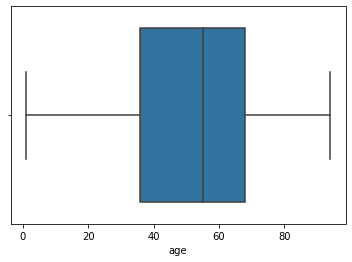

In [ ]:
sns.boxplot(df['age'])
plt.show()

Boxplot seems normal.

**TSH**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


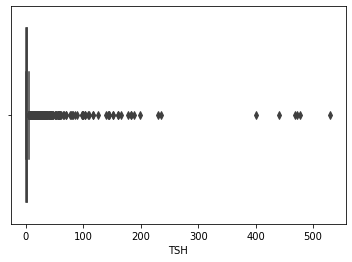

In [ ]:
sns.boxplot(df['TSH'])

This boxplot seems to be extreme.

$_"$A high TSH level—above 4.5 mU/L—indicates an underactive thyroid, also known as hypothyroidism. This means your body is not producing enough thyroid hormone.$"$

Lets see if the TSH value are above of the 95%, what is the target variable.

In [ ]:
df[TARGET][df['TSH'] > df['TSH'].quantile(0.95)].value_counts()

primary_hypothyroid        84
compensated_hypothyroid    51
negative                   31
Name: Class, dtype: int64

Most likely, if the TSH is an extreme value, there is a primary or compensated hypothyroid. For this reason I will not do anything with the outliers. Sometimes in real life there are extreme values, which can not be forgotten.

In [ ]:
df['TSH'].isna().sum()

186

In [ ]:
describer(data = df, feature = 'TSH')

Number of NaN values: 186

 --------------- ORIGINAL ---------------
count    3395.000000
mean        5.083019
std        24.541104
min         0.005000
25%         0.500000
50%         1.400000
75%         2.700000
max       530.000000
Name: TSH, dtype: float64

 --------------- MEDIAN ***************
count    3581.000000
mean        4.891720
std        23.909057
min         0.005000
25%         0.510000
50%         1.400000
75%         2.600000
max       530.000000
Name: TSH, dtype: float64

 --------------- MEAN ***************
count    3581.000000
mean        5.083019
std        23.895081
min         0.005000
25%         0.510000
50%         1.500000
75%         3.100000
max       530.000000
Name: TSH, dtype: float64


Median is closer to the original, plus we have some outliers and it works better in my opinion than mean (if we have outliers)

**T3**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


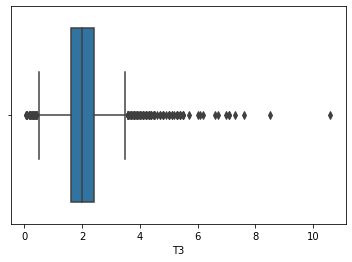

In [ ]:
sns.boxplot(df['T3'])

In [ ]:
df[TARGET][df['T3'] < df['T3'].quantile(0.95)].value_counts()

negative                   2596
compensated_hypothyroid     153
primary_hypothyroid          86
Name: Class, dtype: int64

In [ ]:
describer(data = df, feature = 'T3')

Number of NaN values: 588

 --------------- ORIGINAL ---------------
count    2993.000000
mean        2.014013
std         0.828461
min         0.050000
25%         1.600000
50%         2.000000
75%         2.400000
max        10.600000
Name: T3, dtype: float64

 --------------- MEDIAN ***************
count    3581.000000
mean        2.011712
std         0.757393
min         0.050000
25%         1.700000
50%         2.000000
75%         2.300000
max        10.600000
Name: T3, dtype: float64

 --------------- MEAN ***************
count    3581.000000
mean        2.014013
std         0.757375
min         0.050000
25%         1.700000
50%         2.014013
75%         2.300000
max        10.600000
Name: T3, dtype: float64


**TT4**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


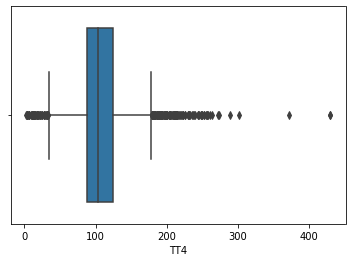

In [ ]:
sns.boxplot(df['TT4'])

In [ ]:
describer(data = df, feature = 'TT4')

Number of NaN values: 46

 --------------- ORIGINAL ---------------
count    3535.000000
mean      108.373069
std        35.581141
min         2.000000
25%        88.000000
50%       103.000000
75%       124.000000
max       430.000000
Name: TT4, dtype: float64

 --------------- MEDIAN ***************
count    3581.000000
mean      108.304049
std        35.356987
min         2.000000
25%        88.000000
50%       103.000000
75%       124.000000
max       430.000000
Name: TT4, dtype: float64

 --------------- MEAN ***************
count    3581.000000
mean      108.373069
std        35.351808
min         2.000000
25%        88.000000
50%       104.000000
75%       124.000000
max       430.000000
Name: TT4, dtype: float64


**T4U**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


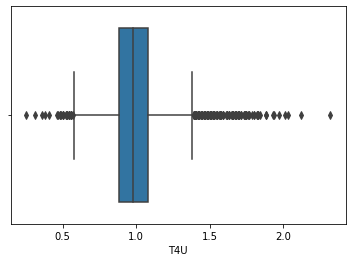

In [ ]:
sns.boxplot(df['T4U'])

In [ ]:
describer(df, 'T4U')

Number of NaN values: 201

 --------------- ORIGINAL ---------------
count    3380.000000
mean        0.995022
std         0.195555
min         0.250000
25%         0.880000
50%         0.980000
75%         1.080000
max         2.320000
Name: T4U, dtype: float64

 --------------- MEDIAN ***************
count    3581.000000
mean        0.994179
std         0.190017
min         0.250000
25%         0.880000
50%         0.980000
75%         1.070000
max         2.320000
Name: T4U, dtype: float64

 --------------- MEAN ***************
count    3581.000000
mean        0.995022
std         0.189986
min         0.250000
25%         0.880000
50%         0.990000
75%         1.070000
max         2.320000
Name: T4U, dtype: float64


**FTI**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


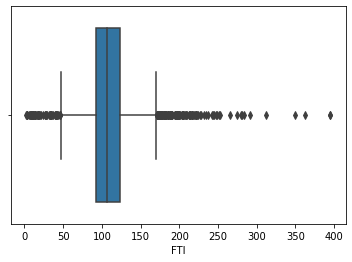

In [ ]:
sns.boxplot(df['FTI'])

In [ ]:
describer(df, 'FTI')

Number of NaN values: 199

 --------------- ORIGINAL ---------------
count    3382.000000
mean      110.499911
std        33.081520
min         2.000000
25%        93.000000
50%       107.000000
75%       124.000000
max       395.000000
Name: FTI, dtype: float64

 --------------- MEDIAN ***************
count    3581.000000
mean      110.305417
std        32.158930
min         2.000000
25%        93.000000
50%       107.000000
75%       123.000000
max       395.000000
Name: FTI, dtype: float64

 --------------- MEAN ***************
count    3581.000000
mean      110.499911
std        32.148931
min         2.000000
25%        93.000000
50%       109.000000
75%       123.000000
max       395.000000
Name: FTI, dtype: float64


I will replace nan values with the median.

**sex**

In [ ]:
df['sex'].isna().sum()

140

In [ ]:
df['sex'].value_counts()

F    2327
M    1114
Name: sex, dtype: int64

Mostly the record are from Female, so i will replace the 150 nan values with F.

In [ ]:
df['sex'] = df['sex'].fillna('F')
df['sex'].value_counts()

F    2467
M    1114
Name: sex, dtype: int64

I think we don't need referral source feature, since it just give informations about where the data from, and in my opinion that not effects the target variable.

In [ ]:
df = df.drop('referral_source', axis = 1)

In [ ]:
for col in df.select_dtypes('object').columns.tolist():
  print(df[col].value_counts(), '\n')

F    2467
M    1114
Name: sex, dtype: int64 

f    3133
t     448
Name: on_thyroxine, dtype: int64 

f    3531
t      50
Name: query_on_thyroxine, dtype: int64 

f    3542
t      39
Name: on_antithyroid_medication, dtype: int64 

f    3444
t     137
Name: sick, dtype: int64 

f    3529
t      52
Name: pregnant, dtype: int64 

f    3528
t      53
Name: thyroid_surgery, dtype: int64 

f    3523
t      58
Name: I131_treatment, dtype: int64 

f    3353
t     228
Name: query_hypothyroid, dtype: int64 

f    3362
t     219
Name: query_hyperthyroid, dtype: int64 

f    3563
t      18
Name: lithium, dtype: int64 

f    3550
t      31
Name: goitre, dtype: int64 

f    3494
t      87
Name: tumor, dtype: int64 

f    3580
t       1
Name: hypopituitary, dtype: int64 

f    3397
t     184
Name: psych, dtype: int64 

negative                   3293
compensated_hypothyroid     194
primary_hypothyroid          94
Name: Class, dtype: int64 



hypopituitary has only 1 't' value, so drop that feature.

In [ ]:
df = df.drop('hypopituitary', axis = 1)

For the other features, we don't know how they effect the target variable, even if it has only 20-30 't' cases. Maybe, those cases are really important.

## Target variable analysis

Text(0.5, 1.0, 'Target Outcome Counts')

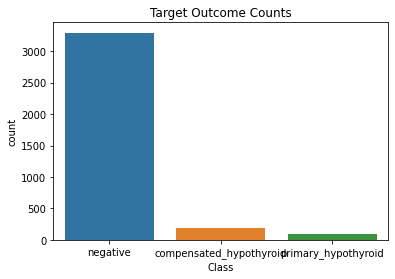

In [ ]:
sns.countplot(x = TARGET, data = df)
plt.title('Target Outcome Counts')

Text(0.5, 1.0, 'Hypothyroid Counts')

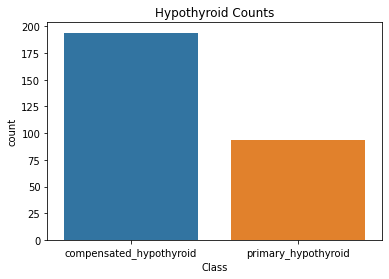

In [ ]:
sns.countplot(x = TARGET, data = df[df[TARGET] != 'negative'])
plt.title('Hypothyroid Counts')

Text(0.5, 0, 'Age')

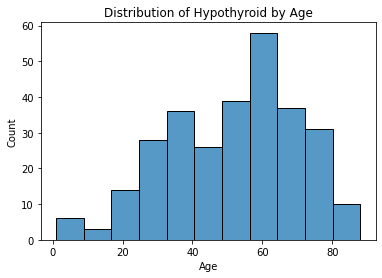

In [ ]:
sns.histplot(x = 'age', data = df[df[TARGET] != 'negative'])
plt.title('Distribution of Hypothyroid by Age')
plt.xlabel('Age')

Most of the positive cases recorded at the age around 60.

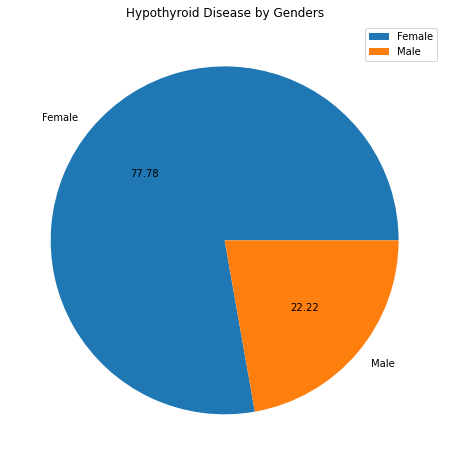

In [ ]:
plt.figure(figsize = (8, 8))
plt.pie(x = df['sex'][df[TARGET] != 'negative'].value_counts(), labels = ['Female', 'Male'], autopct = '%.2f')
plt.title('Hypothyroid Disease by Genders')
plt.legend()
plt.show()

Positive cases in this dataset are mainly accorded to Females. (The whole dataset is unbalanced if we analyse the genders, two times more females then males.)

# Split the data

Make sure that the features has the correct dtype

In [ ]:
df.dtypes

age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
sick                          object
pregnant                      object
thyroid_surgery               object
I131_treatment                object
query_hypothyroid             object
query_hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
psych                         object
TSH                          float64
T3                           float64
TT4                          float64
T4U                          float64
FTI                          float64
Class                         object
dtype: object

In [ ]:
numerical = df.select_dtypes('float64').columns.tolist()
categorical = df.select_dtypes('object').columns.tolist()
categorical.remove(TARGET)

print(numerical)
print(categorical)

['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'psych']


In [ ]:
X, y = df[numerical + categorical], df[TARGET]

In [ ]:
y

0                      negative
1                      negative
2                      negative
3                      negative
4                      negative
                 ...           
3766    compensated_hypothyroid
3768                   negative
3769                   negative
3770                   negative
3771                   negative
Name: Class, Length: 3581, dtype: object

In [ ]:
X.head()

,age,TSH,T3,TT4,T4U,FTI,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,psych
0,41.0,1.30,2.5,125.0,1.14,109.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f
1,23.0,4.10,2.0,102.0,NaN,NaN,F,f,f,f,f,f,f,f,f,f,f,f,f,f
2,46.0,0.98,NaN,109.0,0.91,120.0,M,f,f,f,f,f,f,f,f,f,f,f,f,f
3,70.0,0.16,1.9,175.0,NaN,NaN,F,t,f,f,f,f,f,f,f,f,f,f,f,f
4,70.0,0.72,1.2,61.0,0.87,70.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f


Fill missing values with **median**

In [ ]:
X_tr = X
X_tr = X_tr.fillna(X_tr.median())
X_tr.isna().sum()

<ipython-input-591-48b55f9c35b8>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_tr = X_tr.fillna(X_tr.median())


age                          0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
psych                        0
dtype: int64

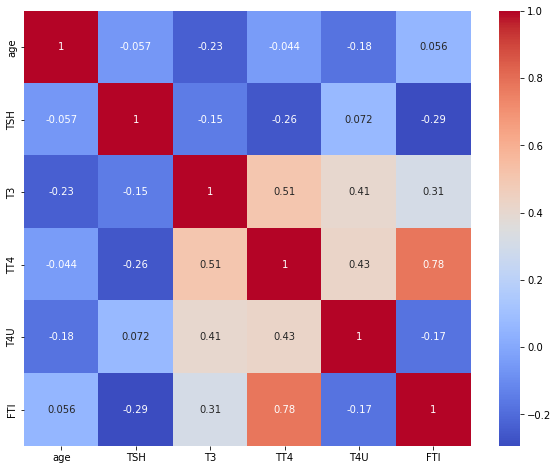

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(X_tr.corr(), cmap = 'coolwarm', annot = True)

There is no such multicollinearity, only at TT4 and FTI. We will later check it, if it cause some problem.

In [ ]:
# I tried to remove one of them, and the scores did not get better.


# X_tr = X_tr.drop('TT4', axis = 1)
# numerical.remove('TT4')

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X_tr, y, random_state = SEED, shuffle = True, test_size = 0.25)

## Encoding, transformation

In [ ]:
numerical_def = gen_features(
    columns = [[c] for c in numerical],
    classes = [
        {'class': SimpleImputer, 'strategy': 'median'},
        {'class': MinMaxScaler}
    ]
)

categorical_def = gen_features(
    columns = [[c] for c in categorical],
    classes = [
        {'class': LabelEncoder}
    ]
)

In [ ]:
features = numerical_def + categorical_def
mapper = DataFrameMapper(features)

In [ ]:
train_X_tr = pd.DataFrame(mapper.fit_transform(train_X))
test_X_tr = pd.DataFrame(mapper.fit_transform(test_X))

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
train_X_tr.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.387097,0.002255,0.180952,0.235981,0.405797,0.236641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.784946,0.010368,0.123810,0.203271,0.357488,0.221374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.677419,0.000462,0.180952,0.210280,0.318841,0.251908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.182796,0.002821,0.180952,0.266355,0.386473,0.277354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.225806,0.002443,0.180952,0.252336,0.333333,0.292621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(train_X_tr.shape, train_y.shape)
print(test_X_tr.shape, test_y.shape)

(2685, 20) (2685,)
(896, 20) (896,)


# Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(train_X_tr, train_y)

LogisticRegression()

In [ ]:
predictions = model.predict(test_X_tr)

print(classification_report(test_y, predictions))

                         precision    recall  f1-score   support

compensated_hypothyroid       0.00      0.00      0.00        50
               negative       0.93      1.00      0.96       819
    primary_hypothyroid       1.00      0.44      0.62        27

               accuracy                           0.93       896
              macro avg       0.64      0.48      0.53       896
           weighted avg       0.88      0.93      0.90       896



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We got 0 f1 score. This can be because of the unbalance of the classes (positive vs negatives).


We can do a SMOTE for this case.

## SMOTE

In [ ]:
smote = SMOTE(random_state = SEED)
train_X_sm, y_sm = smote.fit_resample(train_X_tr, train_y)

print('shape before smote:', train_X_tr.shape)
print('shape after smote:', train_X_sm.shape)

shape before smote: (2685, 20)
shape after smote: (7422, 20)


In [ ]:
model_sm = LogisticRegression()
model_sm.fit(train_X_sm, y_sm)

predictions_sm = model_sm.predict(test_X_tr)
print(classification_report(test_y, predictions_sm))

                         precision    recall  f1-score   support

compensated_hypothyroid       0.27      0.76      0.40        50
               negative       0.98      0.87      0.92       819
    primary_hypothyroid       0.77      0.89      0.83        27

               accuracy                           0.86       896
              macro avg       0.68      0.84      0.72       896
           weighted avg       0.94      0.86      0.89       896



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The F1-score improved, but still low.

Let's see how accurate the prediction is with different models.

# Other models

In [ ]:
models = {
    LogisticRegression(max_iter=500):'Logistic Regression',
    RandomForestClassifier():'Random Forest',
    KNeighborsClassifier(n_neighbors = 5): 'KNN'
}
for m in models.keys():
    m.fit(train_X_sm, y_sm)
for model,name in models.items():
     print(f"Accuracy Score for {name} is : ",model.score(test_X_tr, test_y)*100,"%")

Accuracy Score for Logistic Regression is :  86.38392857142857 %
Accuracy Score for Random Forest is :  98.77232142857143 %
Accuracy Score for KNN is :  84.93303571428571 %


In [ ]:
for model,name in models.items():
    y_pred = model.predict(test_X_tr)
    print(f"Classification Report for {name}")  
    print("----------------------------------------------------------")
    print(classification_report(test_y,y_pred))
    print("----------------------------------------------------------")

Classification Report for Logistic Regression
----------------------------------------------------------
                         precision    recall  f1-score   support

compensated_hypothyroid       0.27      0.76      0.40        50
               negative       0.98      0.87      0.92       819
    primary_hypothyroid       0.77      0.89      0.83        27

               accuracy                           0.86       896
              macro avg       0.68      0.84      0.72       896
           weighted avg       0.94      0.86      0.89       896

----------------------------------------------------------
Classification Report for Random Forest
----------------------------------------------------------
                         precision    recall  f1-score   support

compensated_hypothyroid       0.84      0.98      0.91        50
               negative       1.00      0.99      0.99       819
    primary_hypothyroid       0.96      0.96      0.96        27

               ac

Scores are low again.

Random Forest is the best model for this case. I tried several ways (dropping features, scale them another way, replace with mean instead of median), but none of them worked to get better scores with KNN and Logistic Regression.

In [ ]:
X.select_dtypes('object').columns.tolist()

['sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'I131_treatment',
 'query_hypothyroid',
 'query_hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'psych']

# Without normalization

In [ ]:
X_tr = X

In [ ]:
for col in X_tr.select_dtypes('object').columns.tolist():
  if col == TARGET:
    continue
  else:
    encoder = LabelEncoder()
    X_tr[col] = encoder.fit_transform(X[col])

<ipython-input-608-1cbffe868d0b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_tr[col] = encoder.fit_transform(X[col])


In [ ]:
X_tr = X_tr.fillna(X_tr.median())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tr, y, test_size = 0.2, random_state = SEED)

In [ ]:
smote = SMOTE(random_state = SEED)
x_smote, y_smote = smote.fit_resample(X_train, y_train)

In [ ]:
print("Shape before the Oversampling : ",X_train.shape)
print("Shape after the Oversampling : ",x_smote.shape)

Shape before the Oversampling :  (2864, 20)
Shape after the Oversampling :  (7920, 20)


In [ ]:
X_train.head()

,age,TSH,T3,TT4,T4U,FTI,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,psych
386,63.0,2.700,0.7,41.0,0.60,69.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1560,71.0,0.005,2.2,93.0,0.87,107.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
621,84.0,0.040,2.0,213.0,0.99,216.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3078,47.0,1.200,2.1,130.0,0.99,131.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2452,41.0,0.250,3.1,134.0,1.00,134.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


## Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

                         precision    recall  f1-score   support

compensated_hypothyroid       0.62      0.37      0.46        43
               negative       0.96      0.99      0.97       653
    primary_hypothyroid       0.78      0.67      0.72        21

               accuracy                           0.94       717
              macro avg       0.78      0.68      0.72       717
           weighted avg       0.93      0.94      0.93       717



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Without normalization the scores still low. Try with the smoted data.

In [ ]:
model = LogisticRegression()
model.fit(x_smote, y_smote)

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

                         precision    recall  f1-score   support

compensated_hypothyroid       0.68      0.91      0.78        43
               negative       1.00      0.97      0.98       653
    primary_hypothyroid       0.77      0.95      0.85        21

               accuracy                           0.96       717
              macro avg       0.82      0.94      0.87       717
           weighted avg       0.97      0.96      0.96       717



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Now its much better.

## Other models

In [ ]:
models = {
    LogisticRegression(max_iter = 500):'Logistic Regression',
    SVC():"Support Vector Machine",
    RandomForestClassifier():'Random Forest'
}
for m in models.keys():
    m.fit(x_smote,y_smote)
for model,name in models.items():
     print(f"Accuracy Score for {name} is : ",model.score(X_test,y_test)*100,"%")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score for Logistic Regression is :  97.48953974895397 %
Accuracy Score for Support Vector Machine is :  94.83960948396096 %
Accuracy Score for Random Forest is :  99.30264993026499 %


In [ ]:
for model,name in models.items():
    y_pred = model.predict(X_test)
    print(f"Classification Report for {name}")  
    print("----------------------------------------------------------")
    print(classification_report(y_test,y_pred))
    print("----------------------------------------------------------")

Classification Report for Logistic Regression
----------------------------------------------------------
                         precision    recall  f1-score   support

compensated_hypothyroid       0.80      0.93      0.86        43
               negative       1.00      0.98      0.99       653
    primary_hypothyroid       0.79      0.90      0.84        21

               accuracy                           0.97       717
              macro avg       0.86      0.94      0.90       717
           weighted avg       0.98      0.97      0.98       717

----------------------------------------------------------
Classification Report for Support Vector Machine
----------------------------------------------------------
                         precision    recall  f1-score   support

compensated_hypothyroid       0.60      1.00      0.75        43
               negative       1.00      0.95      0.97       653
    primary_hypothyroid       0.70      0.90      0.79        21

        

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_smote,y_smote)
rf.score(X_test,y_test)

0.99581589958159

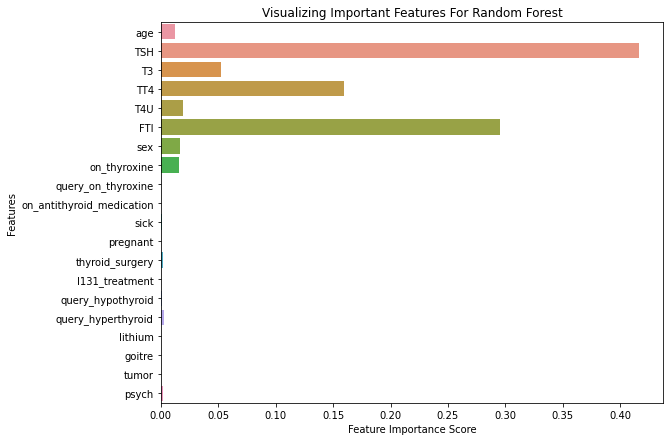

In [ ]:
plt.figure(figsize=(9,7))
feature_imp1 = rf.feature_importances_
sns.barplot(x=feature_imp1, y=X.columns)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features For Random Forest')
plt.show()

## KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_smote, y_smote)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn.predict(X_test)

In [ ]:
print(knn.score(X_test, y_test))

0.9358437935843794


In [ ]:
print(classification_report(y_test, y_pred_knn))

                         precision    recall  f1-score   support

compensated_hypothyroid       0.54      0.81      0.65        43
               negative       0.99      0.95      0.97       653
    primary_hypothyroid       0.69      0.86      0.77        21

               accuracy                           0.94       717
              macro avg       0.74      0.87      0.79       717
           weighted avg       0.95      0.94      0.94       717



With K-Nearest Neighbors the scores are not bad, but the compensated hypothyroid classification just don't work as I want.

It's interesting that without normalization/scaling, the models perform better than with them. I guess this is because of the extreme outlier values. But as I mentoined, I find it important to keep them in such a measurements.

Overall, Random Forest and Logistic Regression done the best work for this dataset, and got the best scores from it.